In [1]:
include("./AbsorptionModels.jl")
using .AbsorptionModels
using Plots
using Latexify
using Catlab.Graphics.Graphviz

# Description of the model

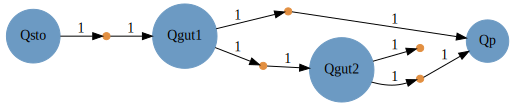

In [21]:
m = gen_model(2)
Graph(m)

In [22]:
latexify(m)

L"\begin{align}
\require{mhchem}
\ce{ Qsto &->[e^{ - \left( kempt t \right)^{1.2}} t^{0.2} 499.56 kempt^{1.2}] Qgut1}\\
\ce{ Qgut1 &->[kabs1] Qp}\\
\ce{ Qgut2 &->[kex] \varnothing}\\
\ce{ Qgut1 &->[k12] Qgut2}\\
\ce{ Qgut2 &->[kabs2] Qp}
\end{align}
"

In [24]:
model = gen_model(10);
# latexify(model)

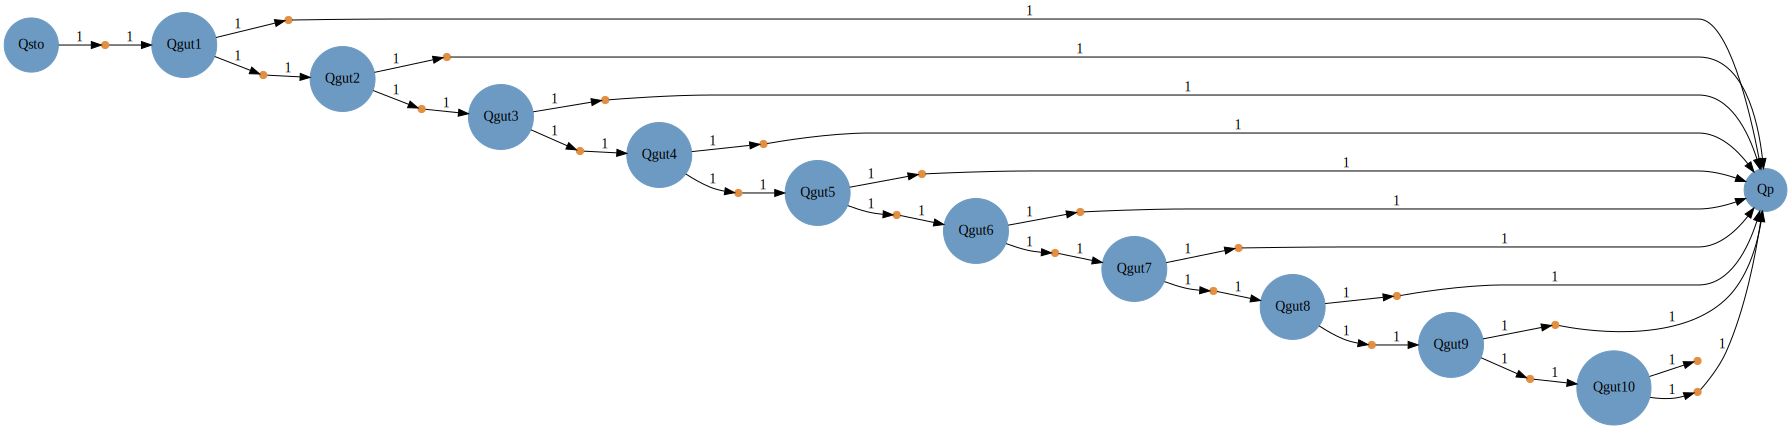

In [3]:
Graph(model)

### Parameter values
- `ktrans` is the velocity `u`, given in Salinari, divided the length (in cm) of each compartment. Indeed, `ktrans*Qgut(i-1)` is the mount of glucose that flows in Qguti each minute while $u*q(z,t)$ is the amount of glucose that flows at z each minute. This is consistant with the dimensions since, `ktrans`:$min^{-1}$, `Qgut`:$mmol$, $q(z,t):mmol.cm^{-1}$, $u:cm.min^{-1}$. Intuitively, the larger is a compartment, the longer time it takes to fill it, which is achieved by decreasing the transit rate.
- to compare the simulated plots with those given in Salinari, we should normalize the quantities by the body weight `BW` (given in Fig. 1 of Salinari et al.). 
- as a first approximation, we take an null excretion and ignore the parameter $f$ of Eq. 5 of Salinari et al.
- **TODO:** vérifier la cinétique de la vidange gastrique: dans salinari il y a un facteur 1/u qui n'est pas présent ici...

# Model with uniform absorption
Here, we reproduce the curves of Fig. 1.

### Parameter values for Fig. 1A & 1B

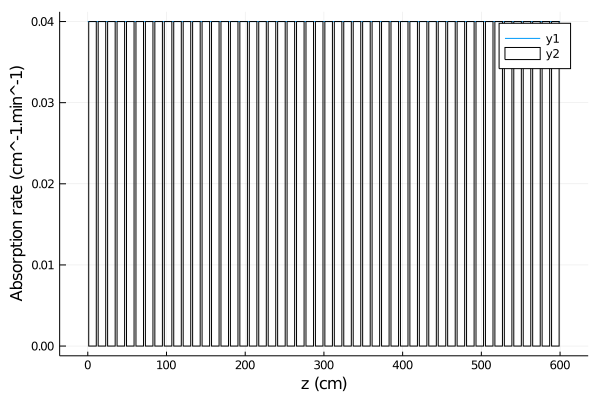

In [4]:
kex = 0 # excretion
n = 50 # number of compartments
ktrans = 4*n/600 # 1/ktrans is the time required for the transit of one intestinal compartment
#ktrans = 4 # 1/ktrans is the time required for the transit of one intestinal compartment
kempt = 0.016 # gastric emptying: k in Salinari
BW = 80 # body weigth needed to convert values in terms of mmol/kg (value given in Fig. 1)
f = 0.87

trans(x) = ktrans
abs(x) = 0.040
plot(0:600,abs)
plot!(0:(600/n):600,discretiz(abs, 0.0, 600.0, n),seriestype = [:bar],color = nothing)
xlabel!("z (cm)")
ylabel!("Absorption rate (cm^-1.min^-1)")

In [5]:
sol = gen_data_set(n, abs, trans, kempt, kex)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 153-element Array{Float64,1}:
   0.0
   9.999999999999999e-5
   0.00018429543737621832
   0.00043634301890563645
   0.0008187808093948925
   0.0014765652531959763
   0.0025720363542103882
   0.004399135755208595
   0.0074425198890878865
   0.012511201733181716
   0.020953916307267575
   0.034989488313286916
   0.057999171303006206
   ⋮
 547.5011801355557
 552.6986344477639
 557.9037320295123
 563.1163039993269
 568.3361751836193
 573.5631859421142
 578.7972134440507
 584.0381906450388
 589.2861173763478
 594.5410617466222
 599.8031517865566
 600.0
u: 153-element Array{Array{Float64,1},1}:
 [416.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [416.29995629622647, 4.370309576654243e-5, 7.394284648432418e-11, 0.0, 6.0385459466228e-10, 5.646699078665208e-15, 3.8139906055205554e-20, 3.8949090172828236e-25, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

### Figure 1A

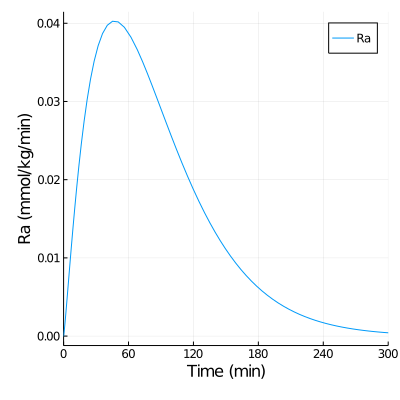

In [6]:
Ra = gen_Ra(sol, abs, n)
#plot(sol.t,f*Ra/BW,label="Ra", xlims = (0,300), ylim=(0,0.05), xticks=0:60:300)
plot(sol.t,f*Ra/BW,label="Ra", xlims = (0,300), xticks=0:60:300,size=(400,400))
xlabel!("Time (min)")
ylabel!("Ra (mmol/kg/min)")
#plot!(sol.t,sol[1,:]/2,label="Gastric delivery", xlims = (0,300), ylim=(0,0.05))

The gastric delivery curve of Fig. 1-A: the shape is ok but the amplitude is weird...

### Figure 1B

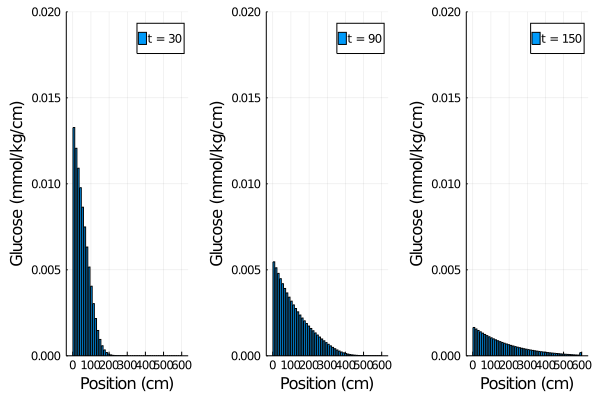

In [7]:
p1= plot(0:(600/n):600,gen_dist_transit(sol,30,n)/(600/n)/BW,seriestype = [:bar],label="t = 30")
p2= plot(0:(600/n):600,gen_dist_transit(sol,90,n)/(600/n)/BW,seriestype = [:bar],label="t = 90")
p3= plot(0:(600/n):600,gen_dist_transit(sol,150,n)/(600/n)/BW,seriestype = [:bar],label="t = 150")
plot(p1,p2,p3,layout=(1,3))
ylims!(0,0.02)
xlabel!("Position (cm)")
ylabel!("Glucose (mmol/kg/cm)")

### Parameter values for Fig 1C & 1D
Only the gastric emptying and absorption rate are permuted. The other parameters are unchanged.

In [8]:
kempt = 0.04
abs(x) = 0.016

abs (generic function with 1 method)

Simulation of glucose absorption:

In [9]:
sol = gen_data_set(n, abs, trans, kempt, kex)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 144-element Array{Float64,1}:
   0.0
   9.999999999999999e-5
   0.000173087831959349
   0.00039690341338980355
   0.0007122620573085358
   0.001264816170275377
   0.0021584917015633623
   0.0036419464346562507
   0.006111769584645965
   0.010226253879819337
   0.017076800285315847
   0.02840912422685333
   0.04667135972311065
   ⋮
 529.3025414040582
 535.6020537597085
 541.931772207848
 548.2919892972163
 554.6825181453888
 561.1027538661943
 567.5517403878404
 574.028240690279
 580.5308147762918
 587.0578997082204
 593.6078979954152
 600.0
u: 144-element Array{Array{Float64,1},1}:
 [416.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [416.2998687658397, 0.00013123225821415322, 8.881461335865539e-11, 0.0, 1.8132636132247278e-9, 1.6955994713501846e-14, 1.1452726945853382e-19, 1.169567568171372e-24, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

### Figure 1C

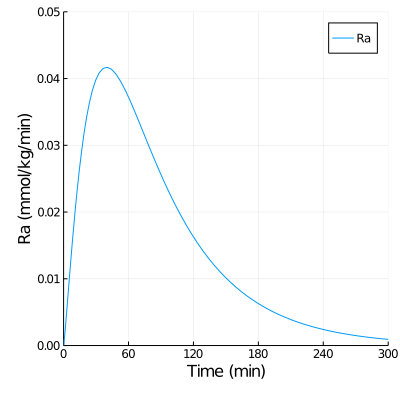

In [10]:
Ra = gen_Ra(sol, abs, n)
plot(sol.t,f*Ra/BW,label="Ra", xlims = (0,300), ylim=(0,0.05), xticks=0:60:300, size=(400,400))
xlabel!("Time (min)")
ylabel!("Ra (mmol/kg/min)")
#plot!(sol.t,sol[1,:]/2,label="Gastric delivery", xlims = (0,300), ylim=(0,0.05))

This curve does not match exactly the one in the paper. However, strangly, in Salinari the curve is the same as the on in Fig. 1A... (abstracting away from the drop around 155 min).

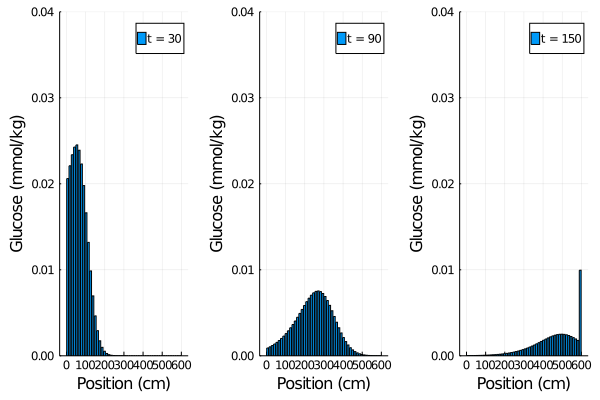

In [11]:
p1= plot(0:(600/n):600,gen_dist_transit(sol,30,n)/(600/n)/BW,seriestype = [:bar],label="t = 30")
p2= plot(0:(600/n):600,gen_dist_transit(sol,90,n)/(600/n)/BW,seriestype = [:bar],label="t = 90")
p3= plot(0:(600/n):600,gen_dist_transit(sol,150,n)/(600/n)/BW,seriestype = [:bar],label="t = 150")
plot(p1,p2,p3,layout=(1,3))
ylims!(0,0.04)
xlabel!("Position (cm)")
ylabel!("Glucose (mmol/kg)")

Here, glucose delivery is (much) higher than glucose absorption, thus glucose tends to accumulate in the intestinal lumen.

# Model with nonuniform absorption
Here we reproduce the curves of Fig. 2.

### Parameter values for Fig. 2B
Uniform distribution of the speed of glucose transit into the gut lumen:

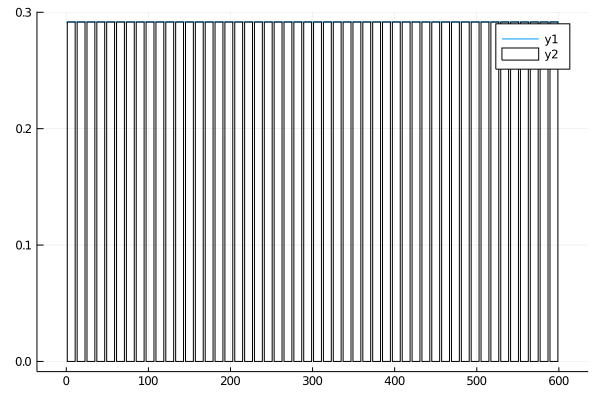

In [12]:
kempt = 0.018
ktrans = 3.5*n/600 # u = 3.5 cm/min in Salinari
trans(x) = ktrans
plot(0:600,trans)
plot!(0:(600/(n)):600,discretiz(trans, 0, 600, n),seriestype = [:bar],color = nothing)

and nonuniform distribution of intestinal absorption rate (Fig. 2.A in Salinari)

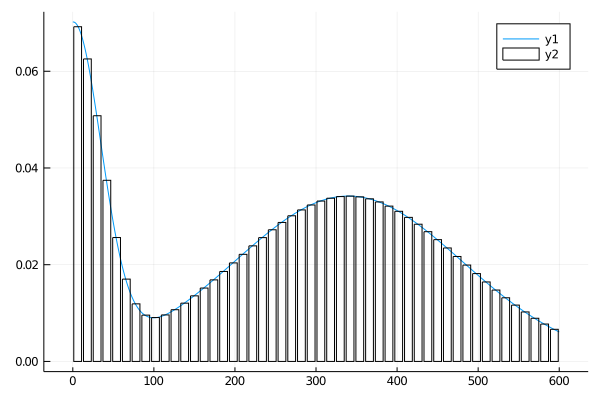

In [13]:
f = gaussian(0,35,6)
g = gaussian(340,140,12)
abs(x) = (f(x) + g(x)) # absortion distribution
plot(0:600,abs)
plot!(0:(600/n):600,discretiz(abs, 0.0, 600.0, n),seriestype = [:bar],color = nothing)

Simulation of glucose absorption 

In [14]:
sol = gen_data_set(n, abs, trans, kempt, kex)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 137-element Array{Float64,1}:
   0.0
   9.999999999999999e-5
   0.00018271778322065624
   0.0004307112850432272
   0.0008029524983872429
   0.0014445911803062192
   0.00250808669565812
   0.004280172300775212
   0.007231416117004091
   0.012146740815228764
   0.02033455603389032
   0.03394916823996759
   0.056284326904897264
   ⋮
 536.1493379717704
 542.2054242388052
 548.2729851701453
 554.3523680384857
 560.4438852927683
 566.5477701595166
 572.6641500340555
 578.7930411395732
 584.9343590282009
 591.0879402329741
 597.2535723446395
 600.0
u: 137-element Array{Array{Float64,1},1}:
 [416.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [416.2999496613041, 5.033793997820024e-5, 1.4734990073239436e-10, 0.0, 6.085886159449794e-10, 4.9795983373480565e-15, 2.9429860658081294e-20, 2.629738444829877e-25, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

### Rate of absorption Ra (Fig. 2B)

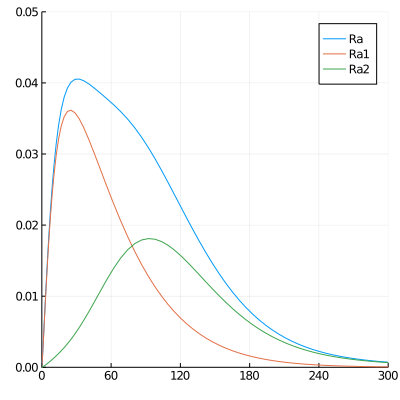

In [15]:
Ra = gen_Ra(sol, abs, n)
Ra1 = gen_Ra(sol, f, n)
Ra2 = gen_Ra(sol, g, n)
plot(sol.t,Ra/BW,label="Ra", xlims = (0,300), ylim=(0,0.05), xticks=0:60:300, size=(400,400))
plot!(sol.t,Ra1/BW,label="Ra1")
plot!(sol.t,Ra2/BW,label="Ra2")

### Distribution of glucose amount in the intestin at different time t (Fig. 2C)

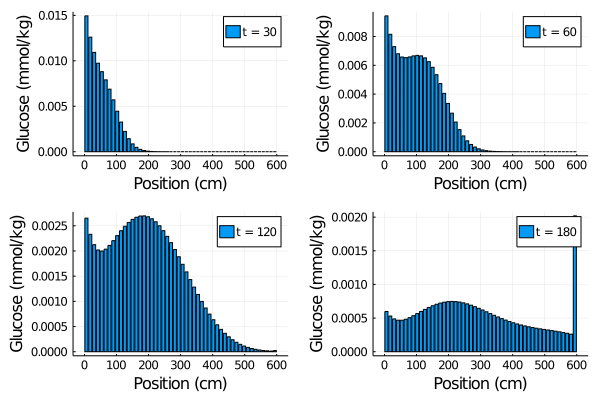

In [16]:
p1= plot(0:(600/n):600,gen_dist_transit(sol,30,n)/(600/n)/BW,seriestype = [:bar],label="t = 30")
p2= plot(0:(600/n):600,gen_dist_transit(sol,60,n)/(600/n)/BW,seriestype = [:bar],label="t = 60")
p3= plot(0:(600/n):600,gen_dist_transit(sol,120,n)/(600/n)/BW,seriestype = [:bar],label="t = 120")
p4= plot(0:(600/n):600,gen_dist_transit(sol,180,n)/(600/n)/BW,seriestype = [:bar],label="t = 180")
plot(p1,p2,p3,p4,layout=(2,2))
xlabel!("Position (cm)")
ylabel!("Glucose (mmol/kg)")

### Dynamics of glucose in each compartment

Glucose compartments are sorted as follows:
1: `Qsto` 
2: `Qgut1`
3: `Qp`
4: `Qgutn`
5: `Qgut2`
6: `Qgut3`
7: `Qgut4`
etc.

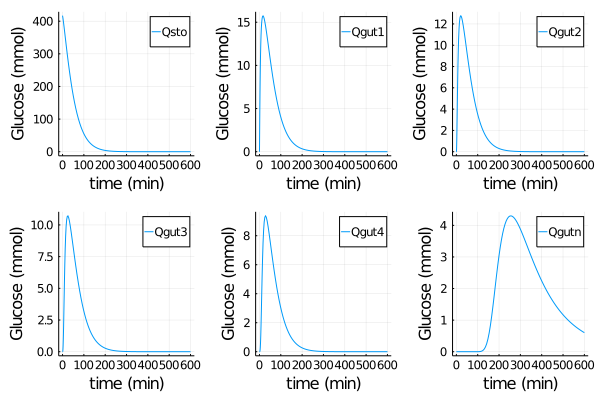

In [17]:
pQsto = plot(sol.t, sol[1,:], label = "Qsto")
pQgut1 = plot(sol.t, sol[2,:], label = "Qgut1")
pQgut2 = plot(sol.t, sol[5,:], label = "Qgut2")
pQgut3 = plot(sol.t, sol[6,:], label = "Qgut3")
pQgut4 = plot(sol.t, sol[7,:], label = "Qgut4")
pQgut10 = plot(sol.t, sol[4,:], label = "Qgutn")
plot(pQsto,pQgut1,pQgut2,pQgut3,pQgut4,pQgut10)
xlabel!("time (min)")
ylabel!("Glucose (mmol)")

### Rate of absorption for different parameter values (Fig. 2D)

In [25]:
# curve (a): c1=3, c2=15
kempt = 0.018
ktrans = 3.5*n/600
trans(x) = ktrans
f = gaussian(0,35,3)
g = gaussian(340,140,15)
abs(x) = (f(x) + g(x)) # absortion distribution
sol_a = gen_data_set(n, abs, trans, kempt, kex)
Ra_a = gen_Ra(sol_a, abs, n)

# curve (b): k=0.028, c1=4, c2=14, z2=380, σ2=100
kempt = 0.028
ktrans = 3.5*n/600
trans(x) = ktrans
f = gaussian(0,35,4)
g = gaussian(380,100,14)
abs(x) = (f(x) + g(x)) # absortion distribution
sol_b = gen_data_set(n, abs, trans, kempt, kex)
Ra_b = gen_Ra(sol_b, abs, n)

# curve (b): k=0.014, u=1.5, c1=8, c2=14
kempt = 0.014
ktrans = 1.5*n/600 # u = 3.5 cm/min in Salinari
trans(x) = ktrans
f = gaussian(0,35,8)
g = gaussian(340,140,14)
abs(x) = (f(x) + g(x)) # absortion distribution
sol_c = gen_data_set(n, abs, trans, kempt, kex)
Ra_c = gen_Ra(sol_c, abs, n);

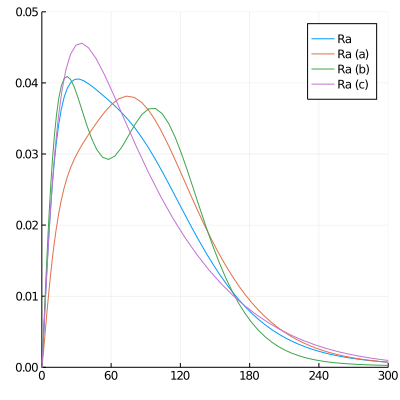

In [19]:
plot(sol.t,Ra/BW,label="Ra",size=(400,400))
plot!(sol_a.t,Ra_a/BW,label="Ra (a)")
plot!(sol_b.t,Ra_b/BW,label="Ra (b)")
plot!(sol_c.t,Ra_c/BW,label="Ra (c)")
xlims!(0,300)
ylims!(0,0.05)
xticks!(0:60:300)